In [2]:
import numpy as np
import pandas as pd

In [3]:
np.random.seed(42)
set1no = 900
set2no = 100


In [4]:
#loc= ortalama, scale= standart sapma

df1 = pd.DataFrame({
    "feature1" : np.random.normal(loc=0, scale=1, size=set1no),
    "feature2" : np.random.normal(loc=0, scale=1, size=set1no),
    "target" : [0] * set1no
})

df2 = pd.DataFrame({
    "feature1" : np.random.normal(loc=0, scale=1, size=set2no),
    "feature2" : np.random.normal(loc=0, scale=1, size=set2no),
    "target" : [1] * set2no
})

In [5]:
df1.head()

,feature1,feature2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0


In [6]:
df2.head()

,feature1,feature2,target
0,1.901191,0.696954,1
1,-0.060661,-0.333819,1
2,-0.708407,1.173125,1
3,-1.513714,0.369642,1
4,-1.803140,-0.107302,1


In [7]:
df1.shape

(900, 3)

In [8]:
df2.shape

(100, 3)

In [10]:
df = pd.concat([df1,df2]).reset_index(drop=True)

In [11]:
df


,feature1,feature2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
995,-0.370011,1.070150,1
996,-0.258796,-0.026521,1
997,1.598647,-0.881875,1
998,0.560919,-0.163067,1


In [14]:
df["target"].unique()

array([0, 1])

In [28]:
#upsampling

df_minority = df[df["target"]==1]
df_majority = df[df["target"]==0]

In [29]:
df_minority

,feature1,feature2,target
900,1.901191,0.696954,1
901,-0.060661,-0.333819,1
902,-0.708407,1.173125,1
903,-1.513714,0.369642,1
904,-1.803140,-0.107302,1
...,...,...,...
995,-0.370011,1.070150,1
996,-0.258796,-0.026521,1
997,1.598647,-0.881875,1
998,0.560919,-0.163067,1


In [21]:
!pip install scikit-learn

In [30]:
from sklearn.utils import resample

In [32]:
df_upsample = resample(df_minority, replace=True, n_samples = len(df_majority), random_state=42)

In [33]:
df_upsample.shape

(900, 3)

In [34]:
df_upsample

,feature1,feature2,target
951,1.775311,1.261922,1
992,-0.436386,1.188913,1
914,-0.268531,-1.801058,1
971,-0.214921,-2.940389,1
960,-0.134309,-0.054894,1
...,...,...,...
952,-1.193637,-0.905732,1
965,-1.662492,0.089581,1
976,-0.562168,1.124113,1
942,-0.548725,0.269127,1


In [35]:
df_upsampled = pd.concat([df_majority,df_upsample])

In [36]:
df_upsampled

,feature1,feature2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
952,-1.193637,-0.905732,1
965,-1.662492,0.089581,1
976,-0.562168,1.124113,1
942,-0.548725,0.269127,1


In [37]:
df_upsampled["target"].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [39]:
resample(df_majority, replace = True, n_samples = len(df_minority), random_state=42)

,feature1,feature2,target
102,-0.342715,0.059630,0
435,0.074095,-0.337086,0
860,0.202923,1.639965,0
270,1.441273,0.758929,0
106,1.886186,0.895193,0
...,...,...,...
201,0.560785,-2.896255,0
269,0.130741,0.853416,0
862,1.547505,0.075434,0
815,-1.485560,-0.090533,0


In [40]:
df_downsample = resample(df_majority, replace = True, n_samples = len(df_minority), random_state=42)

In [44]:
df_downsampled = pd.concat([df_downsample,df_minority])

In [45]:
df_downsampled


,feature1,feature2,target
102,-0.342715,0.059630,0
435,0.074095,-0.337086,0
860,0.202923,1.639965,0
270,1.441273,0.758929,0
106,1.886186,0.895193,0
...,...,...,...
995,-0.370011,1.070150,1
996,-0.258796,-0.026521,1
997,1.598647,-0.881875,1
998,0.560919,-0.163067,1


In [47]:
!pip install imbalanced-learn

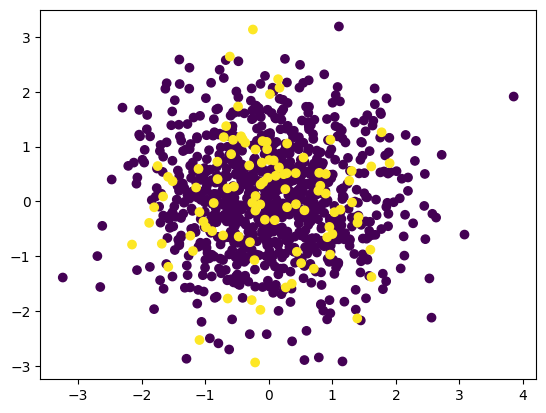

In [49]:
import matplotlib.pyplot as plt
plt.scatter(df["feature1"],df["feature2"],c=df["target"])

In [51]:
from imblearn.over_sampling import SMOTE

In [54]:
oversample = SMOTE()

In [56]:
(X,y) = oversample.fit_resample(df[["feature1", "feature2"]],df["target"])


In [57]:
X

,feature1,feature2
0,0.496714,0.368673
1,-0.138264,-0.393339
2,0.647689,0.028745
3,1.523030,1.278452
4,-0.234153,0.191099
...,...,...
1795,0.006382,0.754327
1796,1.605185,-1.074014
1797,-0.370005,0.086881
1798,0.936239,0.840054


In [58]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1795    1
1796    1
1797    1
1798    1
1799    1
Name: target, Length: 1800, dtype: int64

In [59]:
df_oversample = pd.concat([X,y],axis=1)

In [60]:
df_oversample

,feature1,feature2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
1795,0.006382,0.754327,1
1796,1.605185,-1.074014,1
1797,-0.370005,0.086881,1
1798,0.936239,0.840054,1


In [62]:
df_oversample["target"].value_counts()

target
0    900
1    900
Name: count, dtype: int64

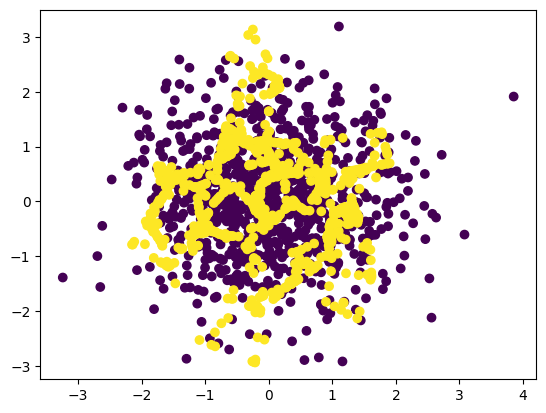

In [63]:
plt.scatter(df_oversample["feature1"],df_oversample["feature2"],c=df_oversample["target"])